<a href="https://colab.research.google.com/github/Youssef-Alyy/machine-learning-labs/blob/main/Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Overview


K-means clustering is widely used for tasks like customer segmentation, image segmentation, and document clustering. However, it has some limitations, such as sensitivity to the initial choice of centroids (K++ as a solution) and difficulty in handling non-linear data distributions.

Unsupervised learning models, including K-means clustering, are used when you have input data without labeled responses or categories. These models aim to find patterns or structures in the data without explicit guidance. They're valuable for exploratory data analysis, dimensionality reduction, and clustering. Other popular unsupervised learning algorithms besides K-means include hierarchical clustering, Gaussian mixture models, and self-organizing maps.


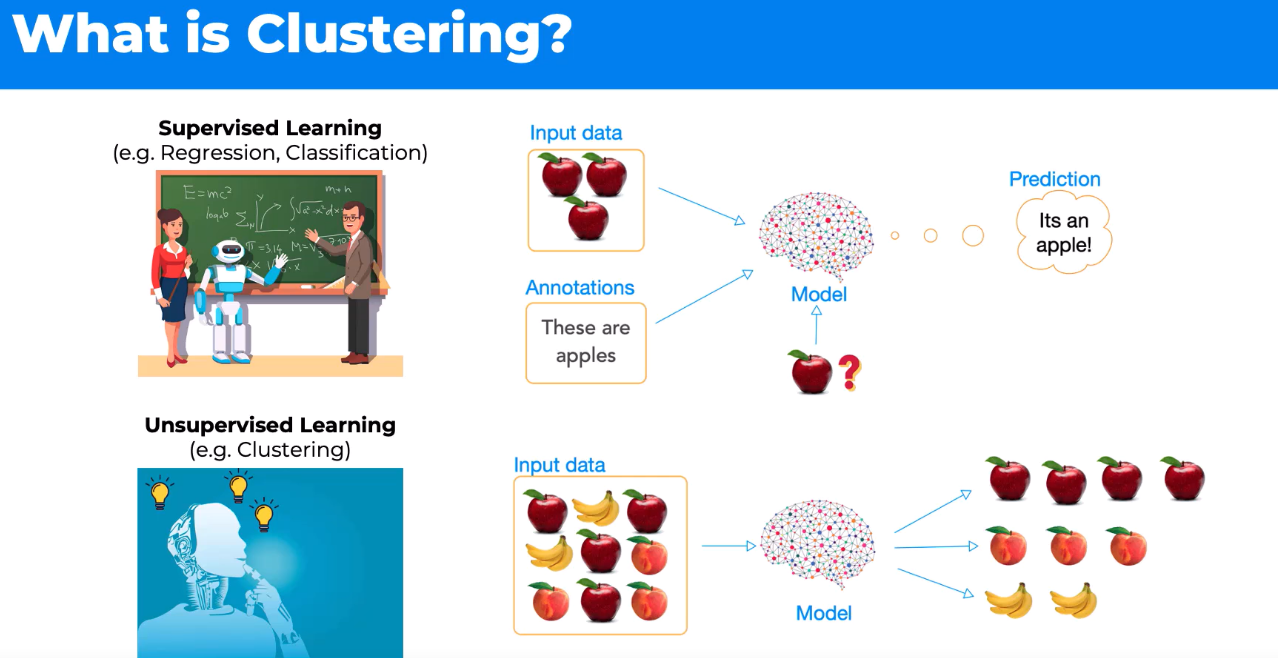

## The Elbow Method

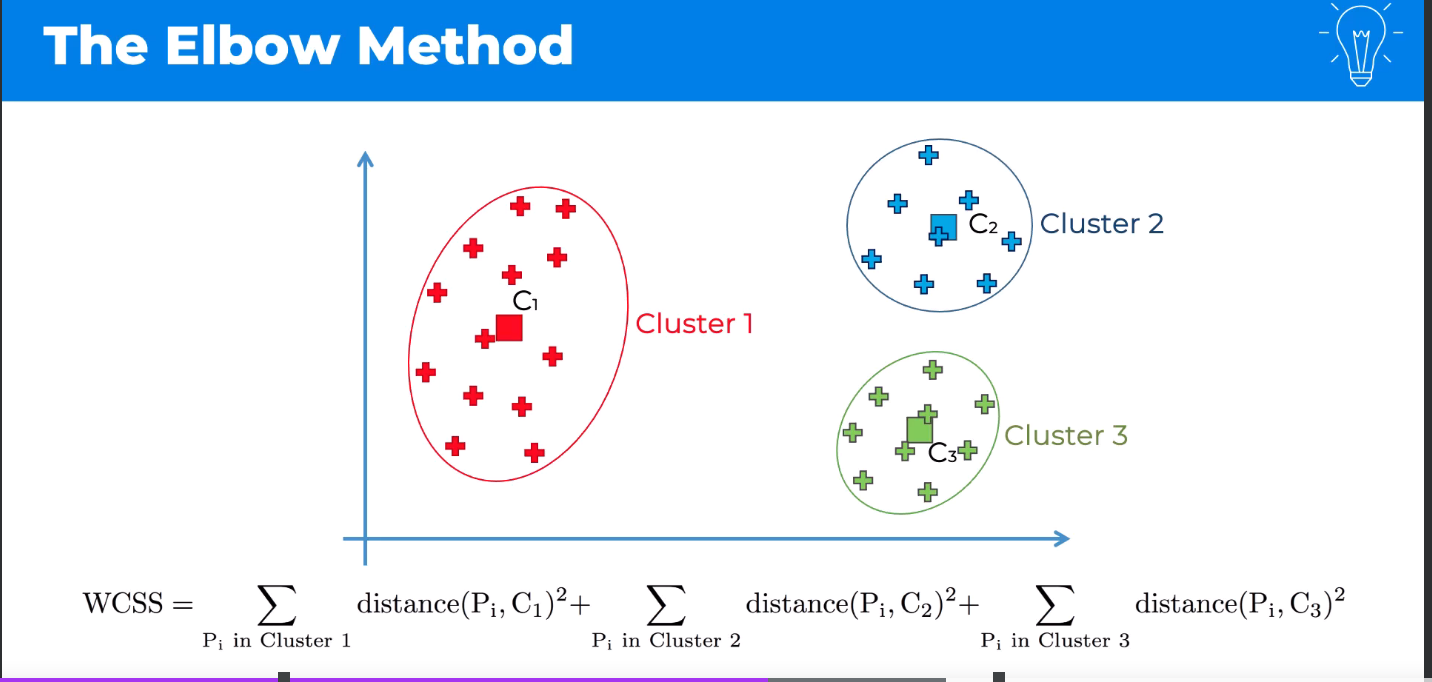

The Elbow methods helps us determine the # of clusters for K-Means model through visualization as shown in the figure below.

**How it works?**
Run K-means many times and find the WCSS for different # of clusters then perform the elbow method as shown below where the optimal # of clusters is where the kink or elbow is.(when the WCSS stops dropping as rapidly).
>Note that More clusters -> Less WCSS. In addition, there might be more than one candidate for the optimal number of clusters

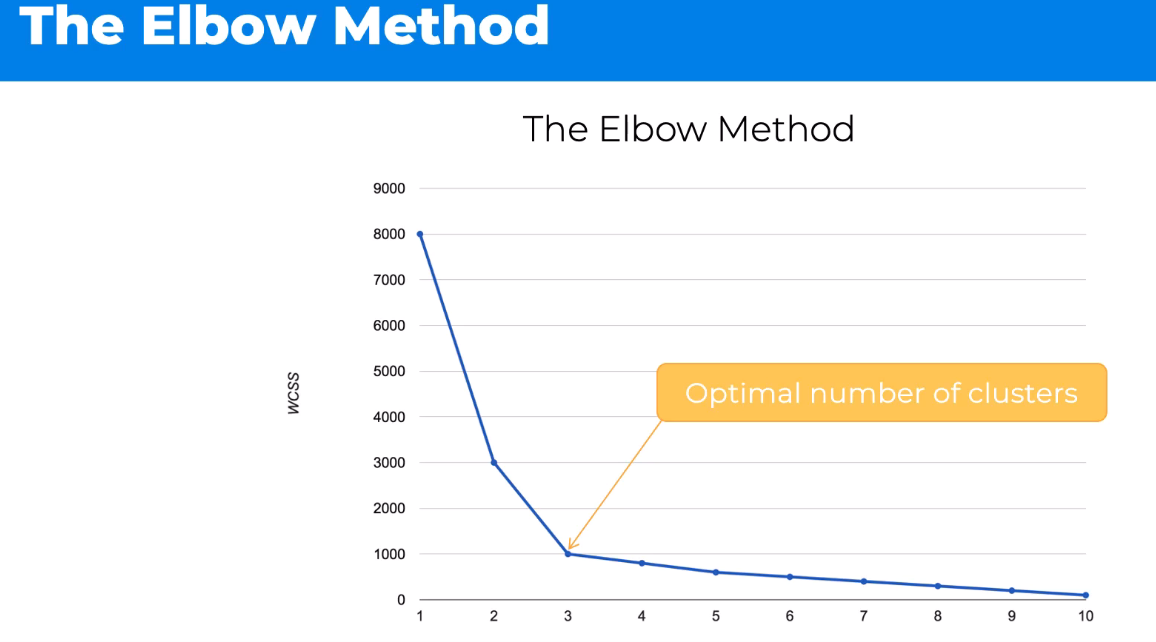

## K-Means++


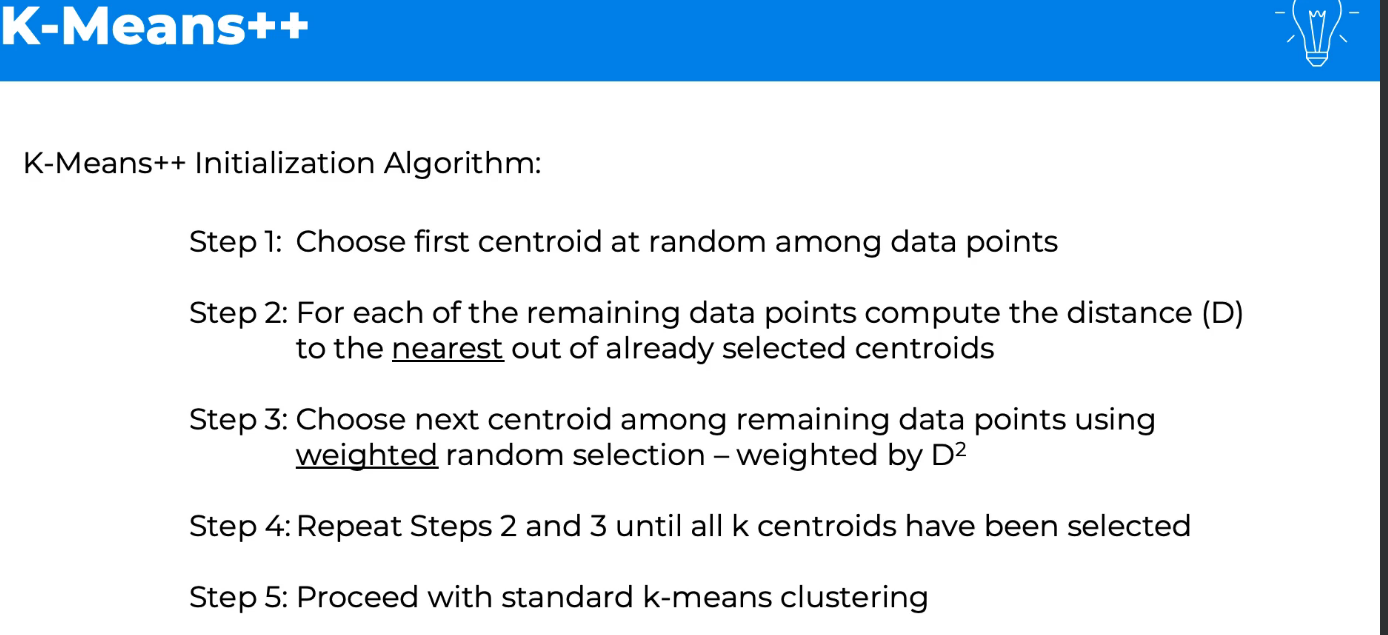

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [24]:
dataset = pd.read_csv('Mall_Customers.csv')
# X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values
X = dataset.iloc[:,[3,4]].values #selected just 2 features so we could visualize in a 2d plot otherwise we will take all columns excluding id
# Do dependent variables.

## Using the elbow method to find the optimal number of clusters

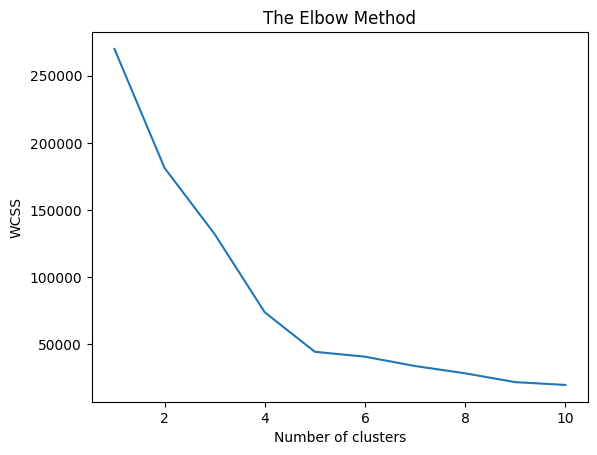

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init="auto",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [30]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init="auto",random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [31]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

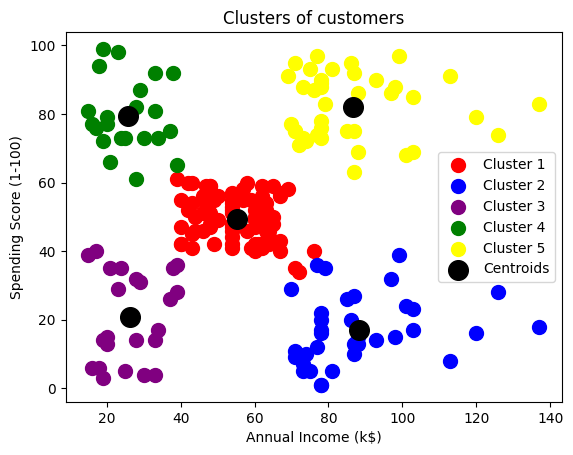

In [36]:
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2, 1],s = 100, c = 'purple', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3, 1],s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4, 1],s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Clustering Analysis

**Cluster 1:** avg annual income and avg spending in mall.(no action - controlled adverts)

**Cluster 2:** high annual income and barely spends in mall.(more attractive advertisments)

**Cluster 3:** low annual income and barely spends in mall. (no action)

**Cluster 4:** low annual income and are big spenders in mall. (limited targeting for ethical reasons)

**Cluster 5:** high annual income and are big spenders in mall. (high potential, make advertisments and notifications)
